### Import packages


In [3]:
from nltk.corpus import PlaintextCorpusReader , stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import pandas as pd
import string
import json
import os
import numpy as np


### Create Document Corpus

In [4]:
corpus_dir = "./Literature-original"
corpus = PlaintextCorpusReader(corpus_dir, ".*\.txt")
files_names = corpus.fileids()
files_names

['Chronicles of Narnia. Prince Caspian.txt',
 'Chronicles of Narnia. The Horse and His Boy.txt',
 'Chronicles of Narnia. The Last Battle.txt',
 'Chronicles of Narnia. The Lion, the Witch and the Wardrobe.txt',
 'Chronicles of Narnia. The Magicians Nephew.txt',
 'Chronicles of Narnia. The Silver Chair.txt',
 'Chronicles of Narnia. The Voyage of the Dawn Treader.txt',
 'Fantastic Beasts and Where to Find Them.txt',
 'Fantastic Beasts. The Crimes of Grindelwald.txt',
 'Fantastic Beasts. The Secrets of Dumbledore.txt',
 'Harry Potter and the Chamber of Secrets.txt',
 'Harry Potter and the Deathly Hallows Part 1.txt',
 'Harry Potter and the Deathly Hallows Part 2.txt',
 'Harry Potter and the Goblet of Fire.txt',
 'Harry Potter and the Half-Blood Prince.txt',
 'Harry Potter and the Order of the Phoenix.txt',
 'Harry Potter and the Philosophers Stone.txt',
 'Harry Potter and the Prisoner of Azkaban.txt',
 'Twilight Saga. Breaking Dawn Part 1.txt',
 'Twilight Saga. Breaking Dawn Part 2.txt',
 

### Corpus documents corpus

In [5]:
documents = {}
for file_name in files_names:
    documents[file_name] = corpus.raw(file_name)
print(json.dumps(documents, indent=4, ensure_ascii=False))

{
    "Chronicles of Narnia. Prince Caspian.txt": "Peter, Susan, Edmund, and Lucy Pevensie are magically whisked away from a British railway station to a beach near an old and ruined castle. They determine the ruin is Cair Paravel, where they once ruled as the kings and queens of Narnia. They discover the treasure vault where Peter's sword and shield, Susan's bow and arrows, and Lucy's dagger and bottle of magical cordial are stored. Susan's horn for summoning help is missing, as she left it in the woods the day they returned to England after their prior visit to Narnia. Although only a year has passed in England, 1300 years have passed in Narnia.[a]\r\n\r\nThe children rescue Trumpkin the dwarf from soldiers who are about to drown him. Trumpkin tells the children Narnia's history since their disappearance: Telmarines conquered Narnia, which is now ruled by King Miraz and his wife, Queen Prunaprismia. Miraz usurped the throne by killing his brother, King Caspian IX, the father of Princ

In [6]:
lengths = {}
for file_name in documents:
    lengths[file_name] = {
        "pre": len(word_tokenize(documents[file_name]))
    }
print(json.dumps(lengths, indent=4,ensure_ascii=False))

{
    "Chronicles of Narnia. Prince Caspian.txt": {
        "pre": 657
    },
    "Chronicles of Narnia. The Horse and His Boy.txt": {
        "pre": 850
    },
    "Chronicles of Narnia. The Last Battle.txt": {
        "pre": 1101
    },
    "Chronicles of Narnia. The Lion, the Witch and the Wardrobe.txt": {
        "pre": 793
    },
    "Chronicles of Narnia. The Magicians Nephew.txt": {
        "pre": 1250
    },
    "Chronicles of Narnia. The Silver Chair.txt": {
        "pre": 1275
    },
    "Chronicles of Narnia. The Voyage of the Dawn Treader.txt": {
        "pre": 1203
    },
    "Fantastic Beasts and Where to Find Them.txt": {
        "pre": 765
    },
    "Fantastic Beasts. The Crimes of Grindelwald.txt": {
        "pre": 761
    },
    "Fantastic Beasts. The Secrets of Dumbledore.txt": {
        "pre": 635
    },
    "Harry Potter and the Chamber of Secrets.txt": {
        "pre": 844
    },
    "Harry Potter and the Deathly Hallows Part 1.txt": {
        "pre": 796
    },
 

In [7]:
ps = PorterStemmer()

In [8]:
for file_name in documents:
    documents[file_name] = documents[file_name].lower()
    documents[file_name] = "".join([char for char in documents[file_name] if char not in string.punctuation])
    documents[file_name] = "".join([char for char in documents[file_name] if not char.isdigit()])
    documents[file_name] = " ".join([ps.stem(word) for word in word_tokenize(documents[file_name])])
    documents[file_name] = " ".join([word for word in word_tokenize(documents[file_name]) if word not in list(stopwords.words('english'))])
print(json.dumps(documents, indent=4, ensure_ascii=False))

{
    "Chronicles of Narnia. Prince Caspian.txt": "peter susan edmund luci pevensi magic whisk away british railway station beach near old ruin castl determin ruin cair paravel onc rule king queen narnia discov treasur vault peter sword shield susan bow arrow luci dagger bottl magic cordial store susan horn summon help miss left wood day return england prior visit narnia although onli year ha pass england year pass narniaa children rescu trumpkin dwarf soldier drown trumpkin tell children narnia histori sinc disappear telmarin conquer narnia rule king miraz hi wife queen prunaprismia miraz usurp throne kill hi brother king caspian ix father princ caspian miraz toler right heir princ caspian hi son wa born caspian escap miraz castl aid hi tutor doctor corneliu school lore old narnia gave queen susan horn caspian fled forest wa knock unconsci hi hors bolt awok den talk badger trufflehunt two dwarf nikabrik trumpkin accept caspian king badger dwarv took caspian meet mani creatur old narni

In [9]:
for file_name in documents:
    lengths[file_name]['post'] = len(word_tokenize(documents[file_name]))
print(json.dumps(lengths, indent=4, ensure_ascii=False))

{
    "Chronicles of Narnia. Prince Caspian.txt": {
        "pre": 657,
        "post": 339
    },
    "Chronicles of Narnia. The Horse and His Boy.txt": {
        "pre": 850,
        "post": 448
    },
    "Chronicles of Narnia. The Last Battle.txt": {
        "pre": 1101,
        "post": 562
    },
    "Chronicles of Narnia. The Lion, the Witch and the Wardrobe.txt": {
        "pre": 793,
        "post": 389
    },
    "Chronicles of Narnia. The Magicians Nephew.txt": {
        "pre": 1250,
        "post": 622
    },
    "Chronicles of Narnia. The Silver Chair.txt": {
        "pre": 1275,
        "post": 620
    },
    "Chronicles of Narnia. The Voyage of the Dawn Treader.txt": {
        "pre": 1203,
        "post": 595
    },
    "Fantastic Beasts and Where to Find Them.txt": {
        "pre": 765,
        "post": 416
    },
    "Fantastic Beasts. The Crimes of Grindelwald.txt": {
        "pre": 761,
        "post": 440
    },
    "Fantastic Beasts. The Secrets of Dumbledore.txt": {


In [10]:
lengths = pd.DataFrame.from_dict(lengths, orient='index')

In [11]:
lengths['diff'] = lengths['pre']-lengths['post']
lengths['pct'] = lengths['diff']/lengths['pre']
lengths

,pre,post,diff,pct
Chronicles of Narnia. Prince Caspian.txt,657,339,318,0.484018
Chronicles of Narnia. The Horse and His Boy.txt,850,448,402,0.472941
Chronicles of Narnia. The Last Battle.txt,1101,562,539,0.489555
"Chronicles of Narnia. The Lion, the Witch and the Wardrobe.txt",793,389,404,0.509458
Chronicles of Narnia. The Magicians Nephew.txt,1250,622,628,0.502400
Chronicles of Narnia. The Silver Chair.txt,1275,620,655,0.513725
Chronicles of Narnia. The Voyage of the Dawn Treader.txt,1203,595,608,0.505403
Fantastic Beasts and Where to Find Them.txt,765,416,349,0.456209
Fantastic Beasts. The Crimes of Grindelwald.txt,761,440,321,0.421813
Fantastic Beasts. The Secrets of Dumbledore.txt,635,360,275,0.433071


# Create freequency matrix

In [12]:
docs = pd.DataFrame.from_dict(documents, orient="index")
docs.columns = ['content']
docs

,content
Chronicles of Narnia. Prince Caspian.txt,peter susan edmund luci pevensi magic whisk aw...
Chronicles of Narnia. The Horse and His Boy.txt,boy name shasta ha live life rememb southern p...
Chronicles of Narnia. The Last Battle.txt,western region narnia clever greedi ape shift ...
"Chronicles of Narnia. The Lion, the Witch and the Wardrobe.txt",peter susan edmund luci pevensi evacu london e...
Chronicles of Narnia. The Magicians Nephew.txt,stori begin london dure summer two children di...
Chronicles of Narnia. The Silver Chair.txt,eustac scrubb reform charact follow event voya...
Chronicles of Narnia. The Voyage of the Dawn Treader.txt,two youngest pevensi children luci edmund stay...
Fantastic Beasts and Where to Find Them.txt,british wizard magizoologist newton newt scama...
Fantastic Beasts. The Crimes of Grindelwald.txt,magic congress unit state america macusa trans...
Fantastic Beasts. The Secrets of Dumbledore.txt,albu dumbledor gellert grindelwald briefli mee...


In [13]:
cv = CountVectorizer()
matrix_tf = cv.fit_transform(docs['content'])
matrix_tf

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6019 stored elements and shape (23, 2503)>

In [14]:
sparsity_tf = 1 - (matrix_tf.getnnz()/(matrix_tf.shape[0]*matrix_tf.shape[1]))
sparsity_tf

0.8954472024874498

In [15]:
tv = TfidfVectorizer()
matrix_tfidf = tv.fit_transform(docs['content'])
matrix_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6019 stored elements and shape (23, 2503)>

In [16]:
sparsity_tfidf = 1 - (matrix_tf.getnnz()/(matrix_tf.shape[0]*matrix_tf.shape[1]))
sparsity_tfidf

0.8954472024874498

# Directories for results


In [17]:
if not os.path.exists("./wordclouds"):
    os.mkdir("./wordclouds")
if not os.path.exists("./topic_modelling"):
    os.mkdir("./topic_modelling")
if not os.path.exists("./topic_modelling/topics"):
    os.mkdir("./topic_modelling/topics")
if not os.path.exists("./topic_modelling/documents"):
    os.mkdir("./topic_modelling/documents")
if not os.path.exists("./clustering"):
    os.mkdir("./clustering")
if not os.path.exists("./ngrams"):
    os.mkdir("./ngrams")

# Wordclouds

In [18]:
wordcloud = WordCloud(
    background_color="white",
    max_words=5000,
    contour_width=3,
    contour_color="steelblue"
)

In [19]:
for index, row in docs.iterrows():
    wordcloud.generate(row['content'])
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(index.replace(".txt", ""))
    plt.savefig('./wordclouds/{}'.format(index.replace("txt", "png")))
    plt.close()

# Topic modelling

In [20]:
def plot_top_words(model, feature_names, n_top_words, title, size):
    colors = ['forestgreen','palevioletred','steelblue','aquamarine','maroon','mistyrose','papayawhip','cyan','navy','dodgerblue']
    fig, axes = plt.subplots(*size, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7, color=colors[topic_idx])
        ax.set_title(f"Topic {topic_idx + 1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.savefig(f"./topic_modelling/topics/{title}.png")

In [21]:
def plot_documents(model, matrix, n_topics, title):
    colors = ['forestgreen','palevioletred','steelblue','aquamarine','maroon','mistyrose','papayawhip','cyan','navy','dodgerblue']
    docs_topics = pd.DataFrame(model.transform(matrix), columns=[f"Topic {x}" for x in range(n_topics)])
    docs_topics.index = [file_name.replace(".txt", "") for file_name in files_names]
    plt.figure(figsize=(7,4))
    left = [0] *len(docs_topics)
    for i, col in enumerate(docs_topics.columns):
        plt.barh(docs_topics.index, docs_topics[col], left=left, label=col, color = colors[i])
        left = [left[j]+docs_topics[col].iloc[j] for j in range (len(docs_topics))]
    plt.savefig(f"./topic_modelling/documents/{title}.png")
    plt.close()


In [22]:
n_topics = 6
features_names = cv.get_feature_names_out()
n_top_words = 20
size = (2,3)

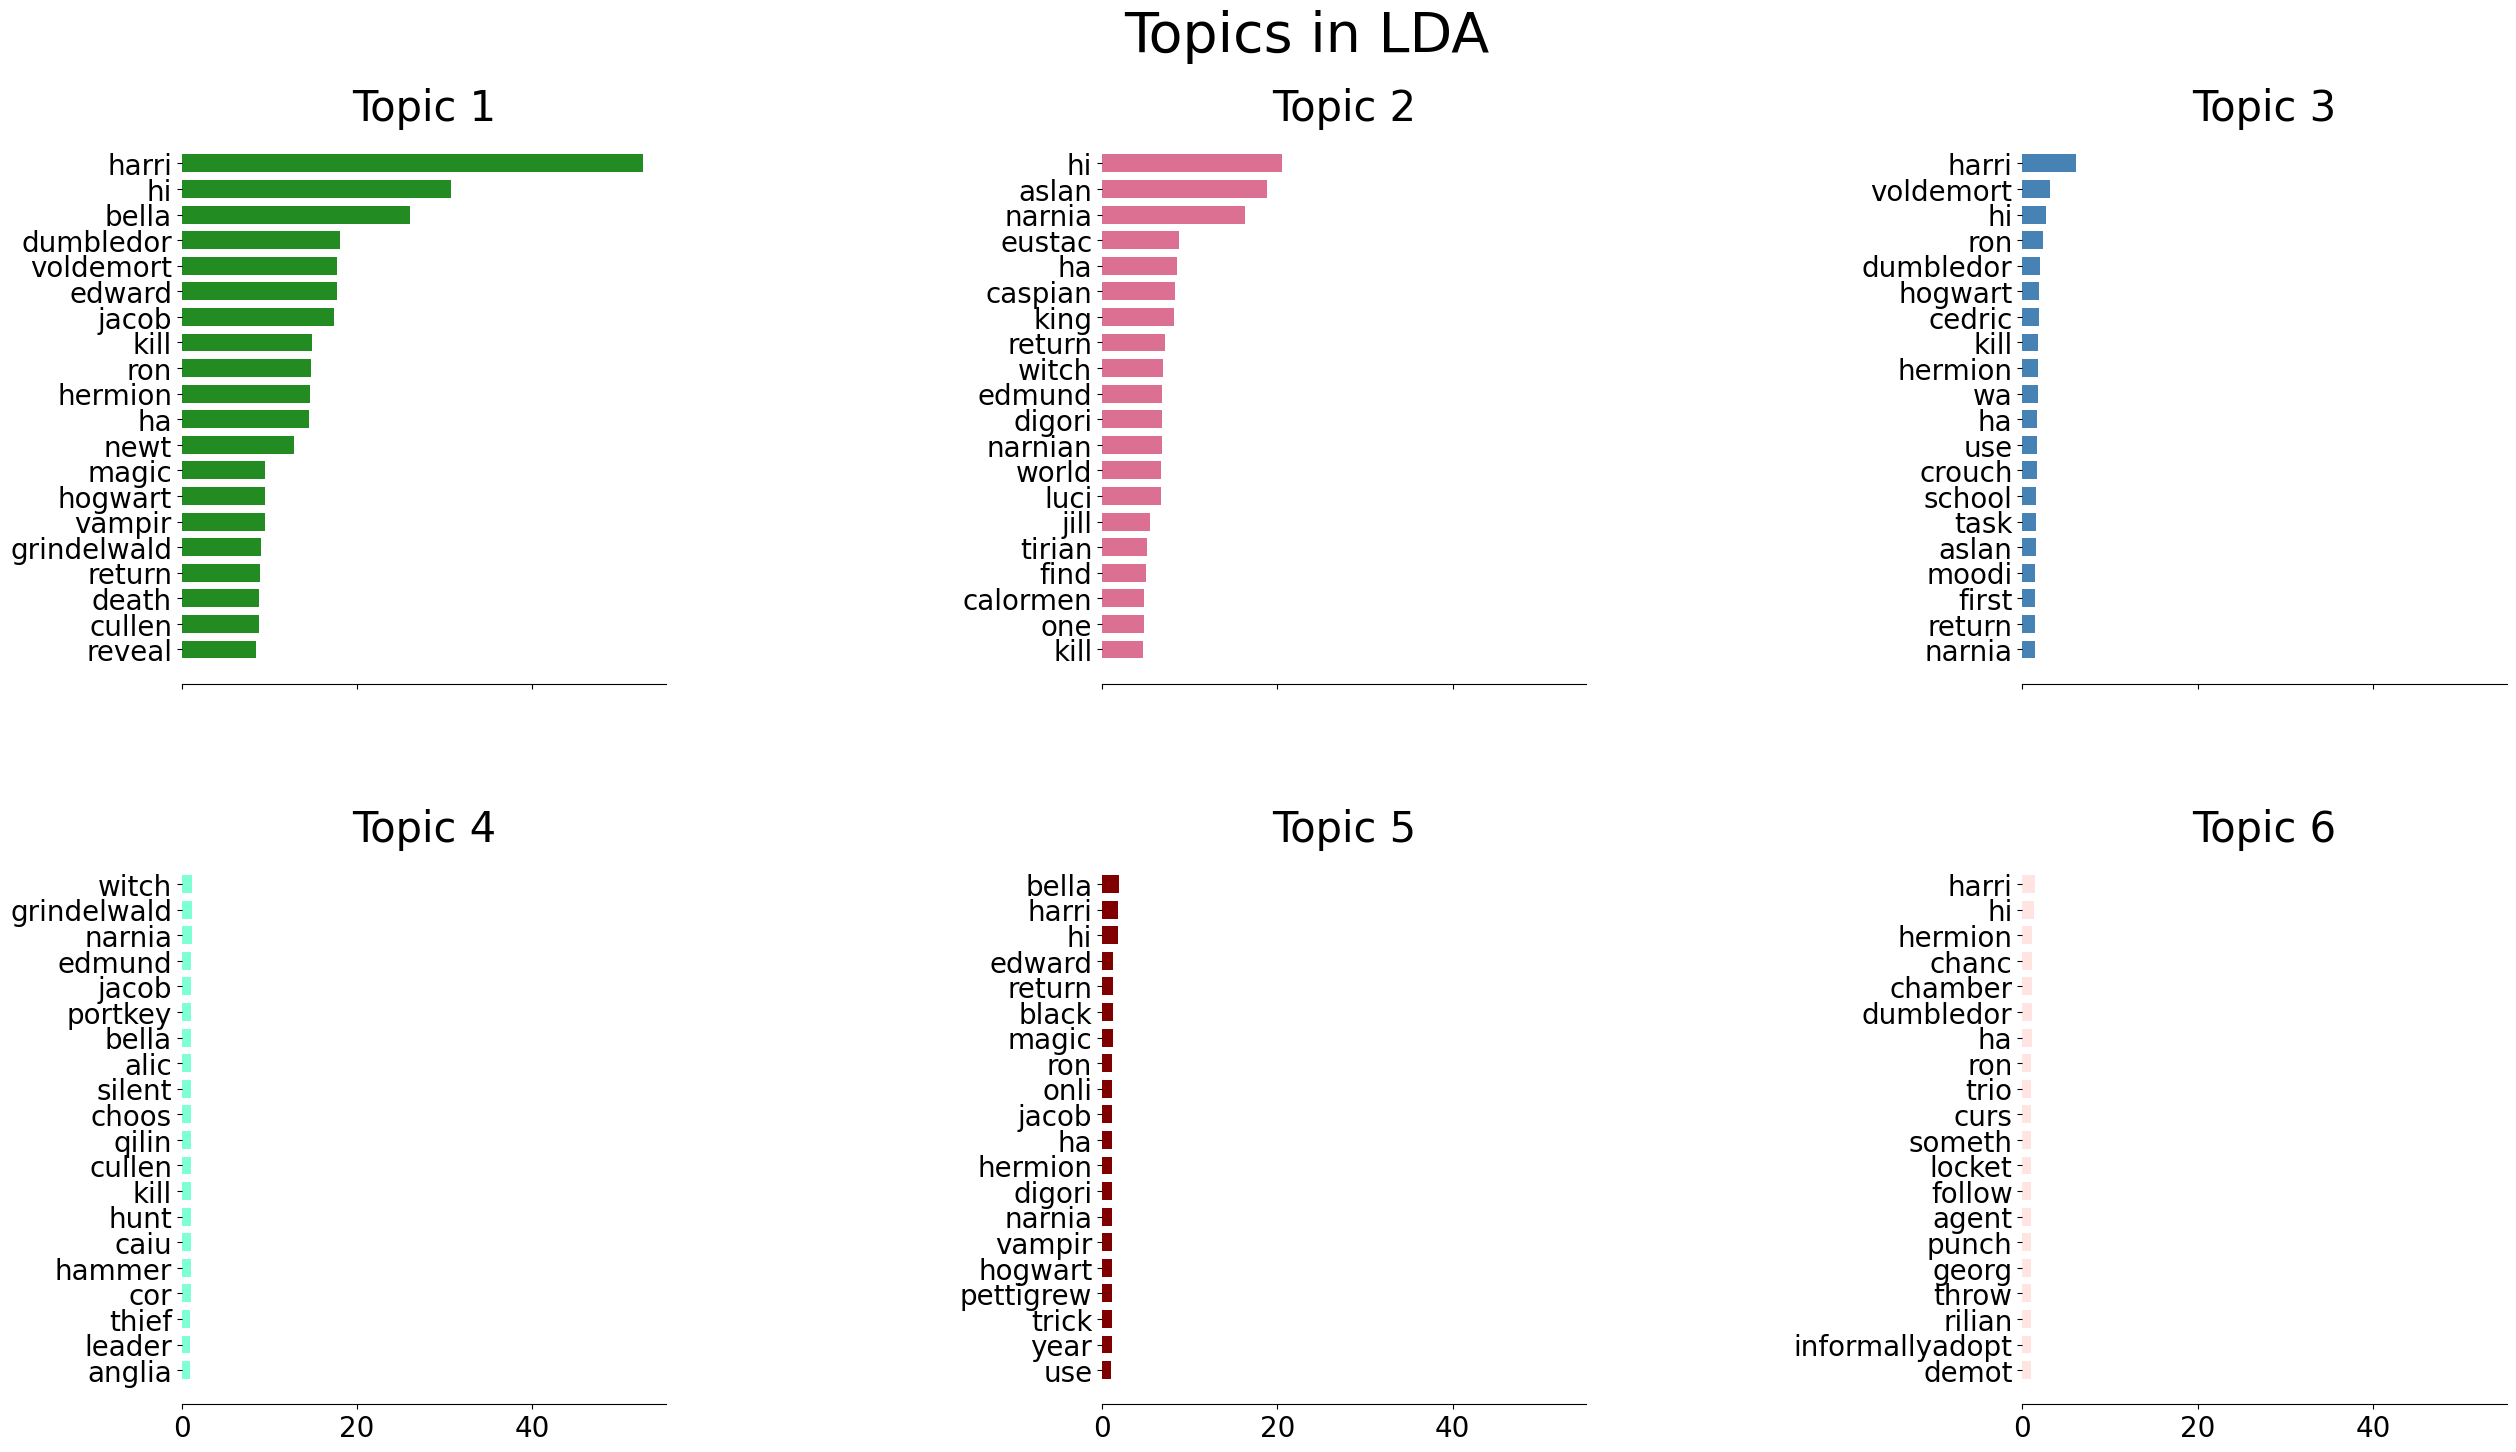

In [23]:
lda = LatentDirichletAllocation(
    n_components=n_topics,
    max_iter=5,
    learning_method='online',
    learning_offset=50,
    random_state=0
)
lda.fit(matrix_tf)
plot_top_words(lda, features_names, n_top_words, "Topics in LDA", size)
plot_documents(lda, matrix_tf, n_topics, "Topics in LDA")

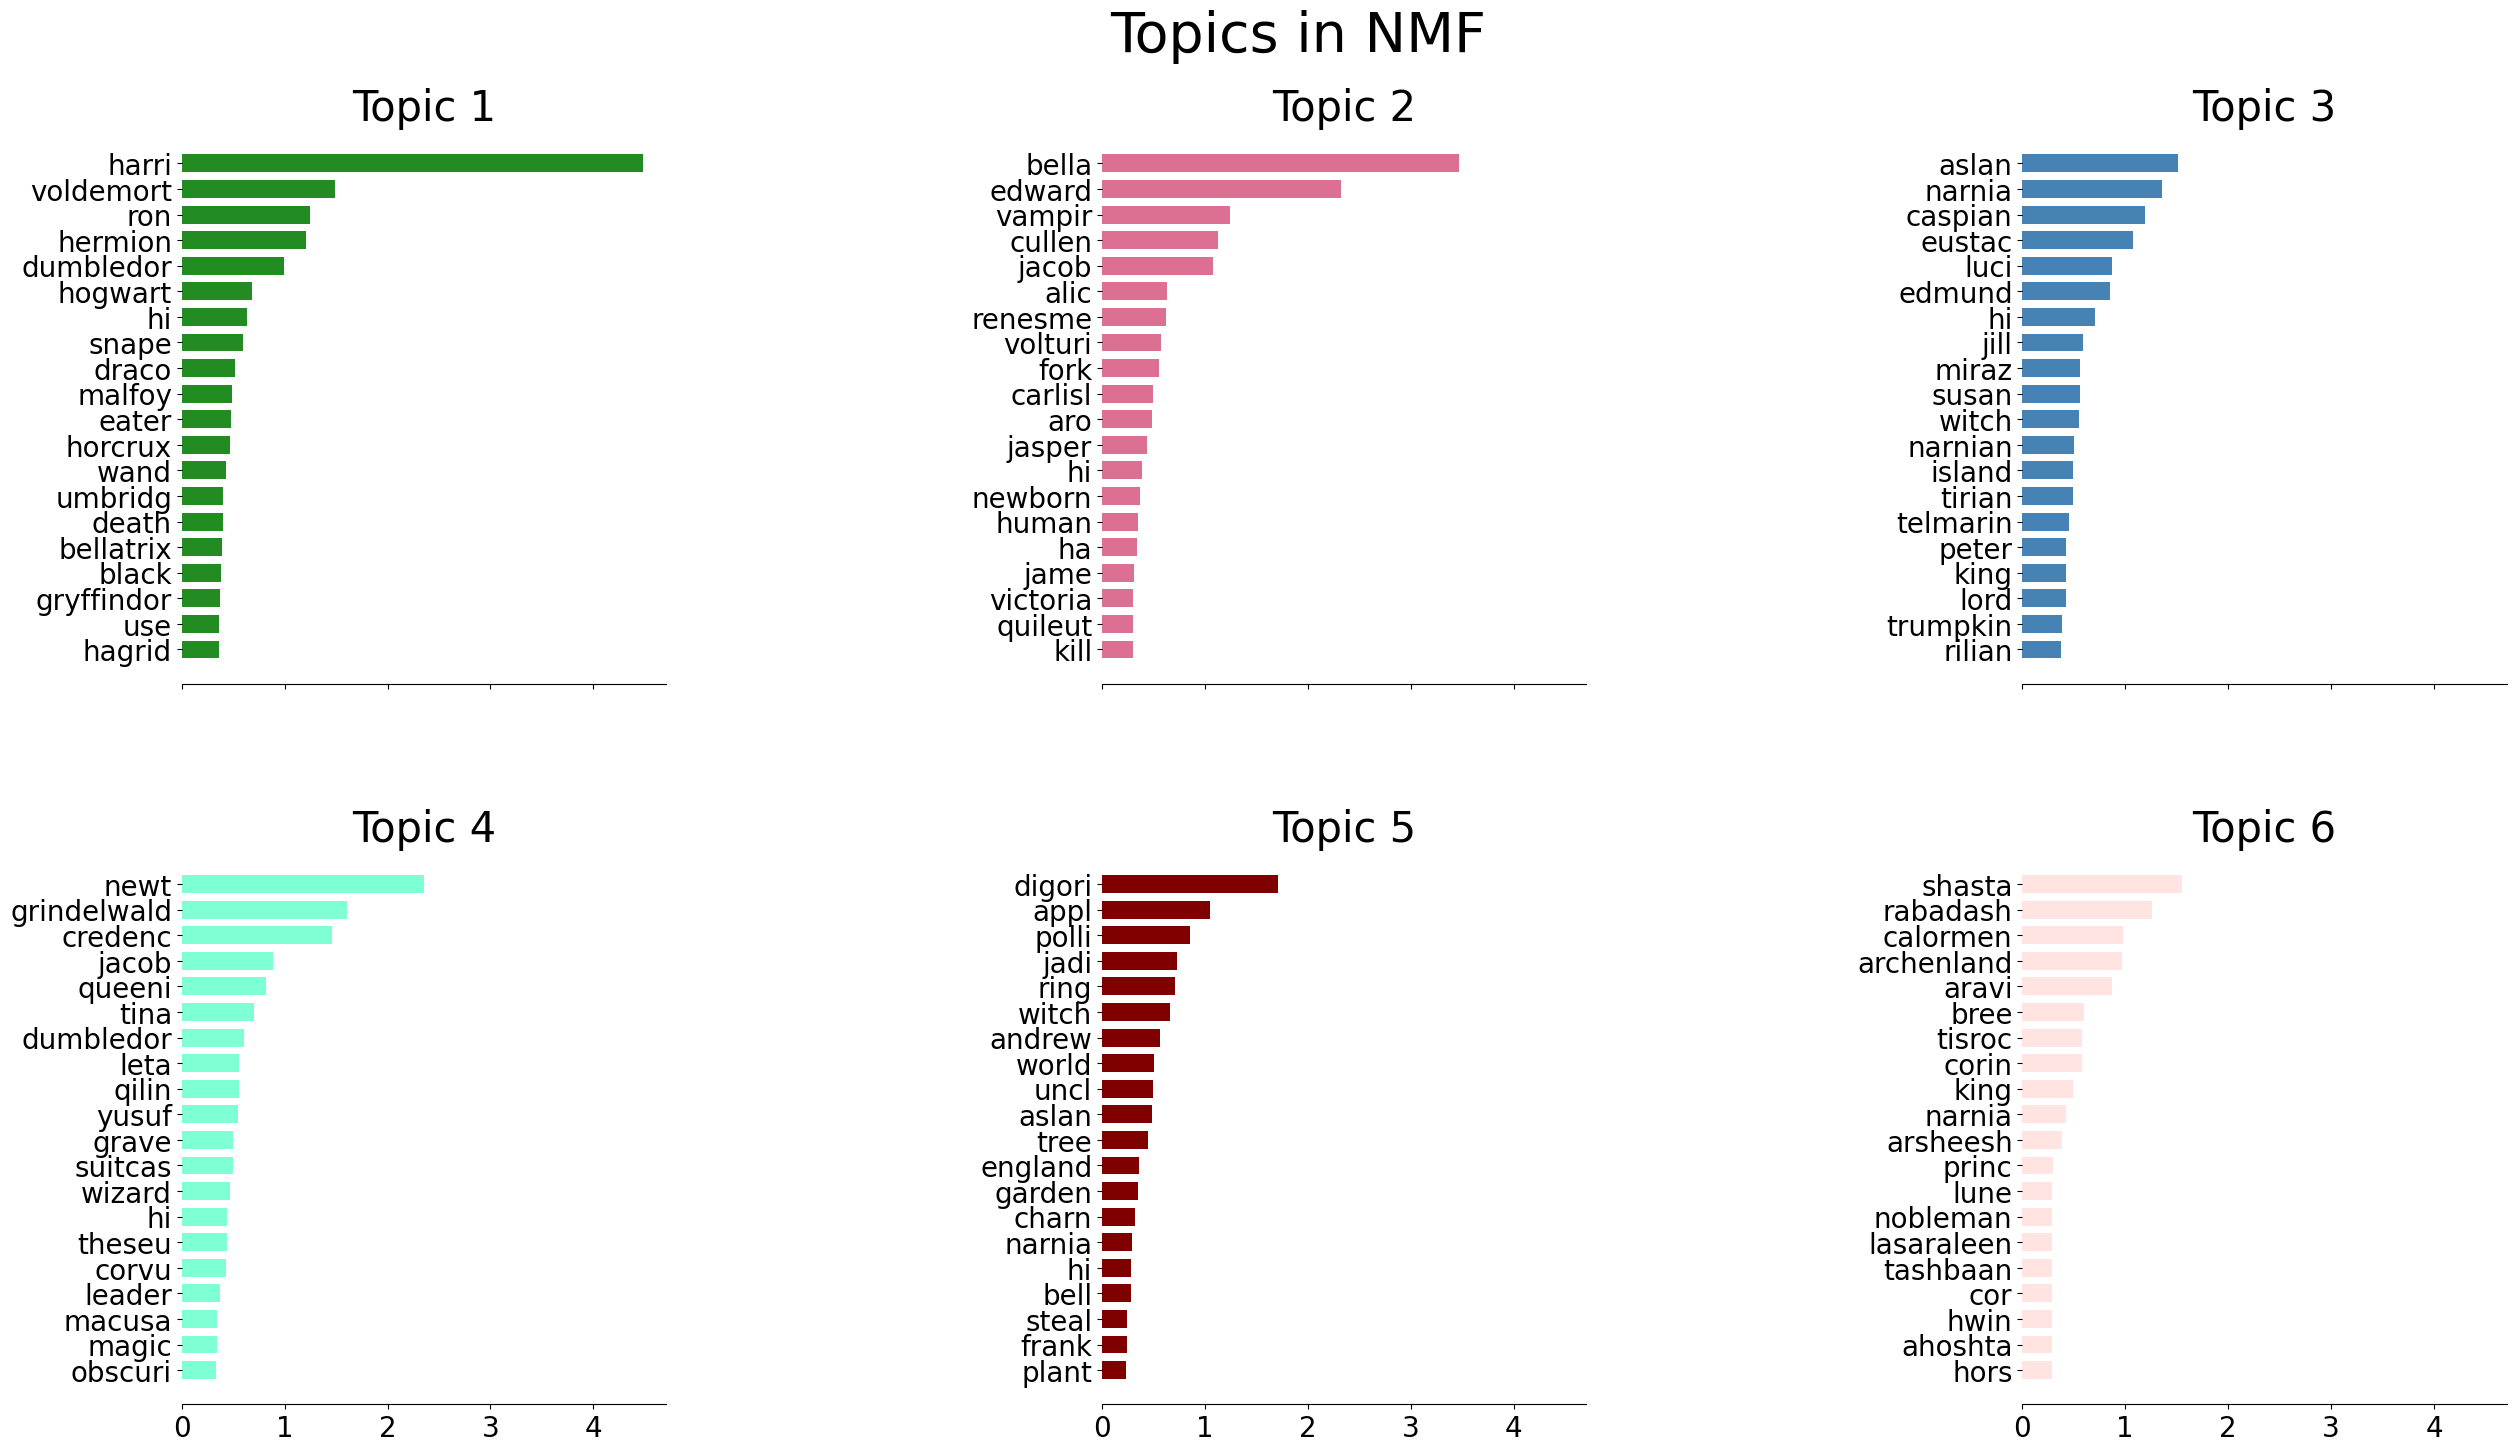

In [24]:
nmf_fn = NMF(
    n_components=n_topics,
    random_state=1,
    alpha_H=.00005,
    alpha_W=.00005,
    l1_ratio=.5
)
nmf_fn.fit(matrix_tfidf)
plot_top_words(nmf_fn, features_names, n_top_words, "Topics in NMF ", size)
plot_documents(nmf_fn, matrix_tfidf, n_topics, "Topics in NMF (FN)")

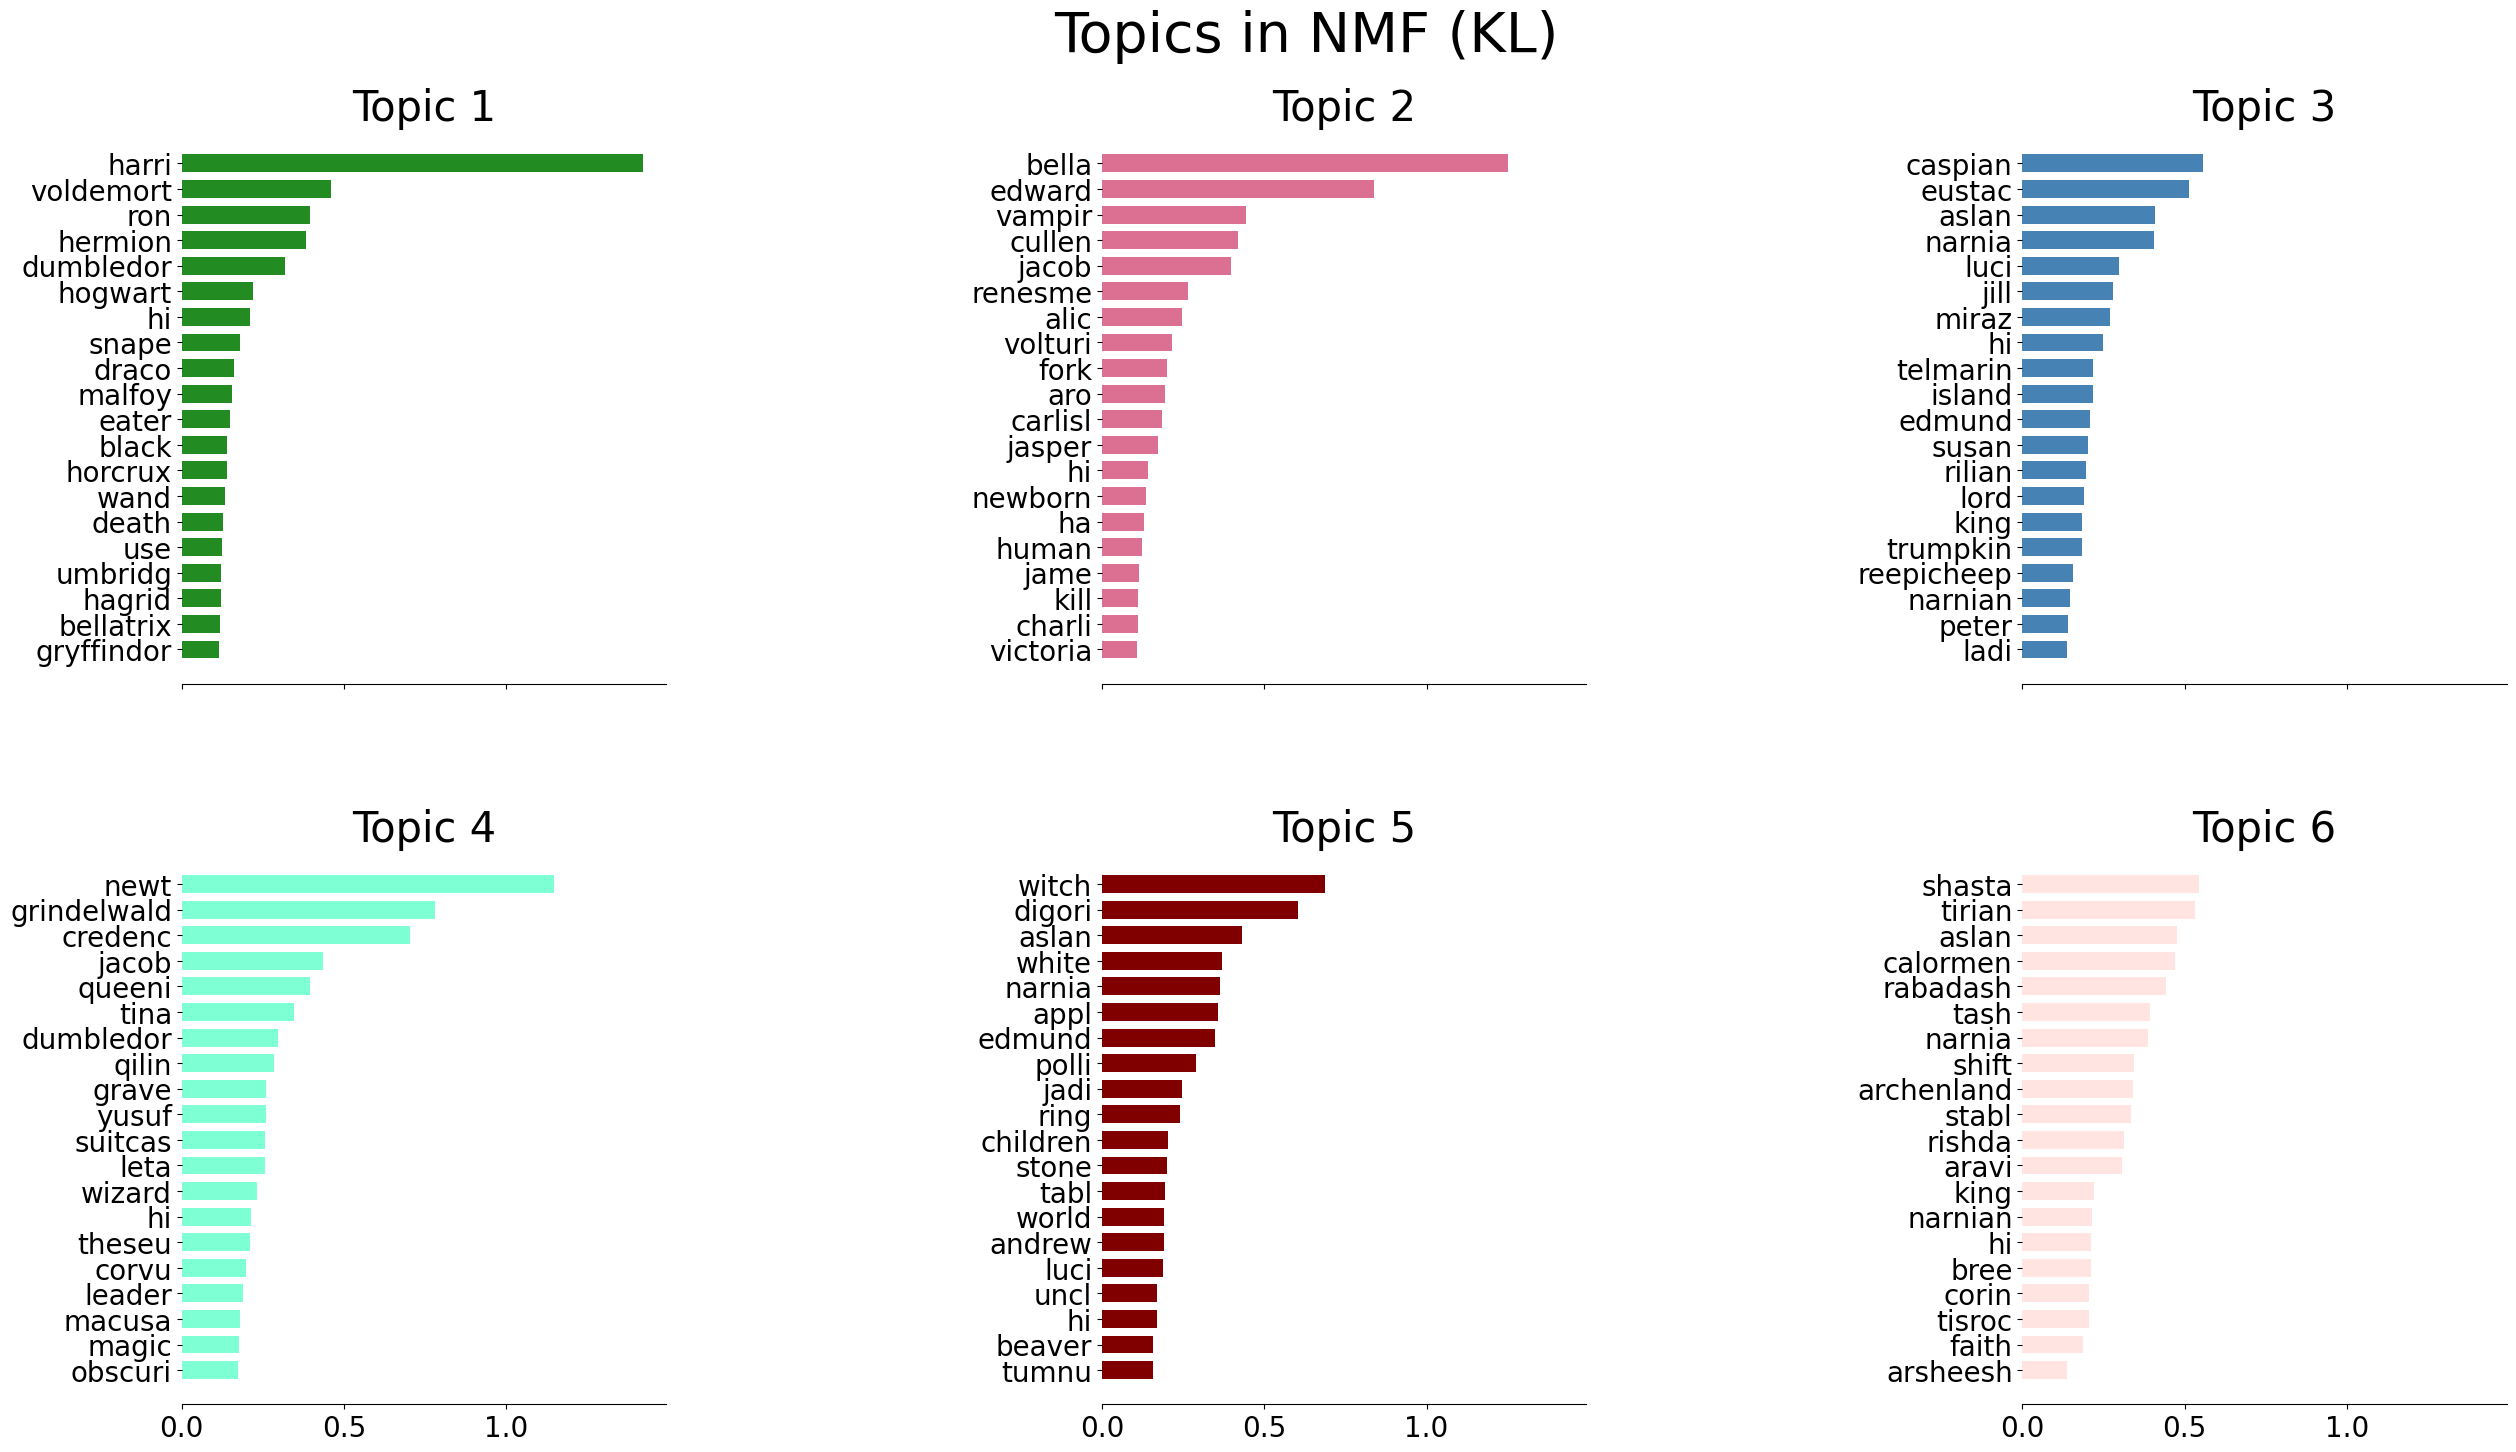

In [25]:
nmf_kl = NMF(
    n_components=n_topics,
    random_state=1,
    alpha_H=.00005,
    alpha_W=.00005,
    l1_ratio=.5,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000
)
nmf_kl.fit(matrix_tfidf)
plot_top_words(nmf_kl, features_names, n_top_words, "Topics in NMF (KL)", size)
plot_documents(nmf_kl, matrix_tfidf, n_topics, "Topics in NMF (KL)")

# Clustering

In [26]:

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwargs)

In [27]:
cs = cosine_similarity(matrix_tfidf, matrix_tfidf).flatten().reshape(matrix_tfidf.shape[0], matrix_tfidf.shape[0])


In [28]:
clustering_cs_ward = AgglomerativeClustering(
    n_clusters=6,
    metric="euclidean",
    compute_distances=True
)
clustering_cs_ward.fit(cs)
print(clustering_cs_ward.labels_)
plot_dendrogram(
    clustering_cs_ward,
    labels = files_names,
    truncate_mode="level",
    orientation="right"
)
plt.savefig("./clustering/cs_ward.png")
plt.close()

[0 5 0 0 4 0 0 3 3 3 1 1 1 1 1 1 1 1 2 2 2 2 2]


In [29]:
cs = euclidean_distances(matrix_tf, matrix_tf).flatten().reshape(matrix_tf.shape[0], matrix_tf.shape[0])

In [30]:
clustering_ed_complete = AgglomerativeClustering(
    n_clusters=6,
    metric="precomputed",
    linkage="complete",
    compute_distances=True
)
clustering_ed_complete.fit(cs)
print(clustering_ed_complete.labels_)
plot_dendrogram(
    clustering_ed_complete,
    labels = files_names,
    truncate_mode="level",
    orientation="right"
)
plt.savefig("./clustering/ed_complete.png")
plt.close()

[0 0 0 0 3 4 0 1 1 1 2 2 2 2 2 2 2 2 5 5 5 5 5]


### N-Grams


In [31]:
documents_tokenized = {}
for key in documents:
    documents_tokenized[key] = word_tokenize(documents[key], language="english")
print(json.dumps(documents_tokenized, indent=4, ensure_ascii=False))


{
    "Chronicles of Narnia. Prince Caspian.txt": [
        "peter",
        "susan",
        "edmund",
        "luci",
        "pevensi",
        "magic",
        "whisk",
        "away",
        "british",
        "railway",
        "station",
        "beach",
        "near",
        "old",
        "ruin",
        "castl",
        "determin",
        "ruin",
        "cair",
        "paravel",
        "onc",
        "rule",
        "king",
        "queen",
        "narnia",
        "discov",
        "treasur",
        "vault",
        "peter",
        "sword",
        "shield",
        "susan",
        "bow",
        "arrow",
        "luci",
        "dagger",
        "bottl",
        "magic",
        "cordial",
        "store",
        "susan",
        "horn",
        "summon",
        "help",
        "miss",
        "left",
        "wood",
        "day",
        "return",
        "england",
        "prior",
        "visit",
        "narnia",
        "although",
        "onli",
      

In [33]:
tokens = 5
for n in range(1,4):
    for title in documents_tokenized:
        n_gram = pd.Series(ngrams(documents_tokenized[title],n)).value_counts()
        n_gram[:tokens].plot.barh()
    plt.savefig(f"./ngrams/{n}_{title}.png")
    plt.close()